In [201]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

warnings.filterwarnings("ignore")

In [ ]:
from ucimlrepo import fetch_ucirepo
#fetch dataset 
ozone_level_detection = fetch_ucirepo(id = 172)

#data (as pandas dataframes)

X = ozone_level_detection.data.features
y = ozone_level_detection.data.targets 

Index(['WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8',
       'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16',
       'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK',
       'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19',
       'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85',
       'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50',
       'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp'],
      dtype='object')

In [ ]:
# Access the columns for dataframe preparation
columns = X.columns
columns = np.insert(np.array(columns), 72, "Class")
columns

array(['WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7',
       'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14',
       'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21',
       'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4',
       'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14',
       'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23',
       'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 'T70', 'RH70',
       'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI',
       'TT', 'SLP', 'SLP_', 'Precp', 'Class'], dtype=object)

In [117]:
filepath1 = r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Final Coursework\Dataset\ozone+level+detection\eighthr.data"
filepath2 = r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Final Coursework\Dataset\ozone+level+detection\onehr.data"
df1 = pd.read_csv(filepath1, header = None)
df2 = pd.read_csv(filepath2, header = None)

# Merge the dataframes 
df = pd.concat([df1, df2], axis=0)
df.head()

0    1    2    3    4    5    6    7    8    9   ...    64     65  \
0  1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15  10.67   
1  1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   8.39   
2  1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   6.94   
3  1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   8.73   
4  1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?      ?   

      66    67     68    69     70   71    72   73  
0  -1.56  5795  -12.1  17.9  10330  -55     0  0.0  
1   3.84  5805  14.05    29  10275  -55     0  0.0  
2    9.8  5790   17.9  41.3  10235  -40     0  0.0  
3  10.54  5775  31.15  51.7  10195  -40  2.08  0.0  
4      ?     ?      ?     ?      ?    ?  0.58  0.0  

[5 rows x 74 columns]

In [118]:
# Drop the first column 
df.drop(columns = df.columns[0], inplace = True)
df.head()

1    2    3    4    5    6    7    8    9    10  ...    64     65     66  \
0  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  2.3  ...  0.15  10.67  -1.56   
1  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  3.4  ...  0.48   8.39   3.84   
2  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  2.5  ...   0.6   6.94    9.8   
3  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  3.1  ...  0.49   8.73  10.54   
4  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  1.4  ...     ?      ?      ?   

     67     68    69     70   71    72   73  
0  5795  -12.1  17.9  10330  -55     0  0.0  
1  5805  14.05    29  10275  -55     0  0.0  
2  5790   17.9  41.3  10235  -40     0  0.0  
3  5775  31.15  51.7  10195  -40  2.08  0.0  
4     ?      ?     ?      ?    ?  0.58  0.0  

[5 rows x 73 columns]

In [119]:
# Add column names into the dataframe
df.columns = columns
df.head()

WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8 WSR9  ...  RH50    U50    V50  \
0  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  2.3  ...  0.15  10.67  -1.56   
1  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  3.4  ...  0.48   8.39   3.84   
2  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  2.5  ...   0.6   6.94    9.8   
3  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  3.1  ...  0.49   8.73  10.54   
4  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  1.4  ...     ?      ?      ?   

   HT50     KI    TT    SLP SLP_ Precp Class  
0  5795  -12.1  17.9  10330  -55     0   0.0  
1  5805  14.05    29  10275  -55     0   0.0  
2  5790   17.9  41.3  10235  -40     0   0.0  
3  5775  31.15  51.7  10195  -40  2.08   0.0  
4     ?      ?     ?      ?    ?  0.58   0.0  

[5 rows x 73 columns]

In [88]:
df.shape

(5070, 73)

In [89]:
df.dtypes.value_counts()

float64    73
Name: count, dtype: int64

In [120]:
# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5070 entries, 0 to 2535
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WSR0    4472 non-null   float64
 1   WSR1    4486 non-null   float64
 2   WSR2    4482 non-null   float64
 3   WSR3    4486 non-null   float64
 4   WSR4    4484 non-null   float64
 5   WSR5    4486 non-null   float64
 6   WSR6    4488 non-null   float64
 7   WSR7    4492 non-null   float64
 8   WSR8    4490 non-null   float64
 9   WSR9    4496 non-null   float64
 10  WSR10   4494 non-null   float64
 11  WSR11   4486 non-null   float64
 12  WSR12   4496 non-null   float64
 13  WSR13   4494 non-null   float64
 14  WSR14   4494 non-null   float64
 15  WSR15   4498 non-null   float64
 16  WSR16   4502 non-null   float64
 17  WSR17   4504 non-null   float64
 18  WSR18   4498 non-null   float64
 19  WSR19   4486 non-null   float64
 20  WSR20   4482 non-null   float64
 21  WSR21   4484 non-null   float64
 22  WSR22

In [121]:
describe_df = df.describe()
describe_df


WSR0         WSR1         WSR2         WSR3         WSR4  \
count  4472.000000  4486.000000  4482.000000  4486.000000  4484.000000   
mean      1.640720     1.586893     1.546095     1.526839     1.522859   
std       1.272062     1.266691     1.239792     1.205410     1.198729   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600000     0.600000     0.600000     0.600000     0.600000   
50%       1.300000     1.300000     1.200000     1.300000     1.300000   
75%       2.400000     2.300000     2.200000     2.200000     2.200000   
max       7.500000     7.700000     7.100000     7.300000     7.200000   

              WSR5         WSR6         WSR7         WSR8         WSR9  ...  \
count  4486.000000  4488.000000  4492.000000  4490.000000  4496.000000  ...   
mean      1.542666     1.638057     2.047729     2.539755     2.848154  ...   
std       1.172087     1.161482     1.160495     1.185480     1.221136  ...   
min       0.000000     0.000000     0.000000     0.100000     0.100000  ...   
25%       0.700000     0.800000     1.200000     1.700000     2.000000  ...   
50%       1.300000     1.400000     1.900000     2.500000     2.800000  ...   
75%       2.100000     2.200000     2.800000     3.300000     3.700000  ...   
max       7.400000     7.400000     7.500000     9.200000     8.500000  ...   

              RH50          U50          V50         HT50           KI  \
count  4820.000000  4650.000000  4650.000000  4846.000000  4798.000000   
mean      0.304693     9.869865     0.831004  5818.859884    10.510932   
std       0.249043     9.528994     7.353208    79.180759    20.711815   
min       0.010000   -14.920000   -25.990000  5480.000000   -56.700000   
25%       0.090000     2.460000    -3.790000  5770.000000    -3.575000   
50%       0.230000     9.230000     0.360000  5835.000000    14.900000   
75%       0.470000    16.710000     4.882500  5880.000000    28.350000   
max       1.000000    42.360000    30.420000  5965.000000    42.050000   

                TT           SLP         SLP_        Precp        Class  
count  4820.000000   4880.000000  4753.000000  5066.000000  5070.000000  
mean     37.388351  10164.189549    -0.125184     0.371879     0.045957  
std      11.227214     52.410377    35.823056     1.317589     0.209412  
min     -10.100000   9975.000000  -135.000000     0.000000     0.000000  
25%      32.287500  10130.000000   -20.000000     0.000000     0.000000  
50%      41.100000  10160.000000     0.000000     0.000000     0.000000  
75%      45.100000  10195.000000    15.000000     0.050000     0.000000  
max      59.150000  10350.000000   140.000000    20.650000     1.000000  

[8 rows x 73 columns]

In [11]:
describe_df.T

count          mean        std     min         25%      50%       75%  \
WSR0   4472.0      1.640720   1.272062     0.0      0.6000      1.3      2.40   
WSR1   4486.0      1.586893   1.266691     0.0      0.6000      1.3      2.30   
WSR2   4482.0      1.546095   1.239792     0.0      0.6000      1.2      2.20   
WSR3   4486.0      1.526839   1.205410     0.0      0.6000      1.3      2.20   
WSR4   4484.0      1.522859   1.198729     0.0      0.6000      1.3      2.20   
...       ...           ...        ...     ...         ...      ...       ...   
KI     4798.0     10.510932  20.711815   -56.7     -3.5750     14.9     28.35   
TT     4820.0     37.388351  11.227214   -10.1     32.2875     41.1     45.10   
SLP    4880.0  10164.189549  52.410377  9975.0  10130.0000  10160.0  10195.00   
SLP_   4753.0     -0.125184  35.823056  -135.0    -20.0000      0.0     15.00   
Precp  5066.0      0.371879   1.317589     0.0      0.0000      0.0      0.05   

            max  
WSR0       7.50  
WSR1       7.70  
WSR2       7.10  
WSR3       7.30  
WSR4       7.20  
...         ...  
KI        42.05  
TT        59.15  
SLP    10350.00  
SLP_     140.00  
Precp     20.65  

[72 rows x 8 columns]

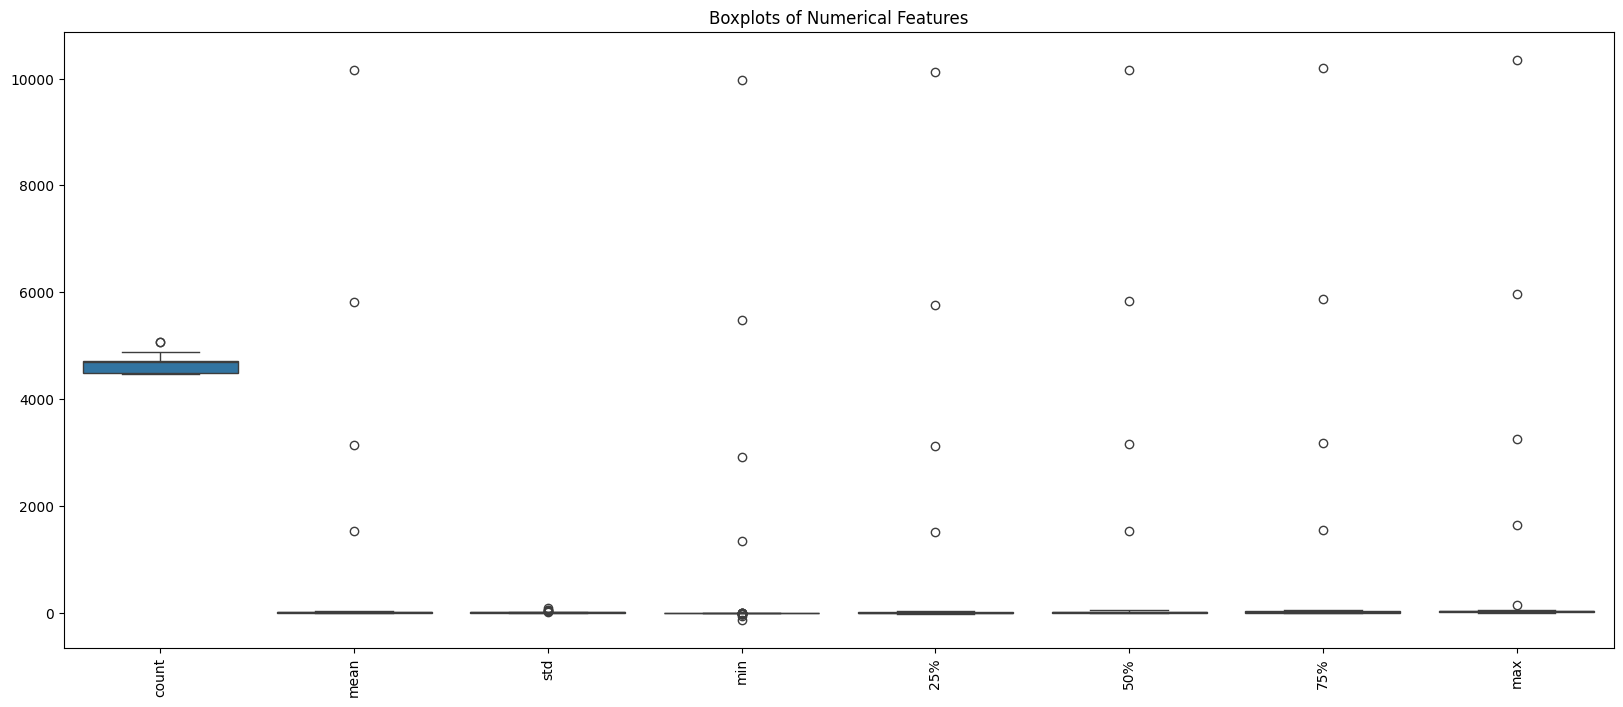

In [93]:
plt.figure(figsize=(20,8))
sns.boxplot(data = describe_df.T)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features")
plt.show()

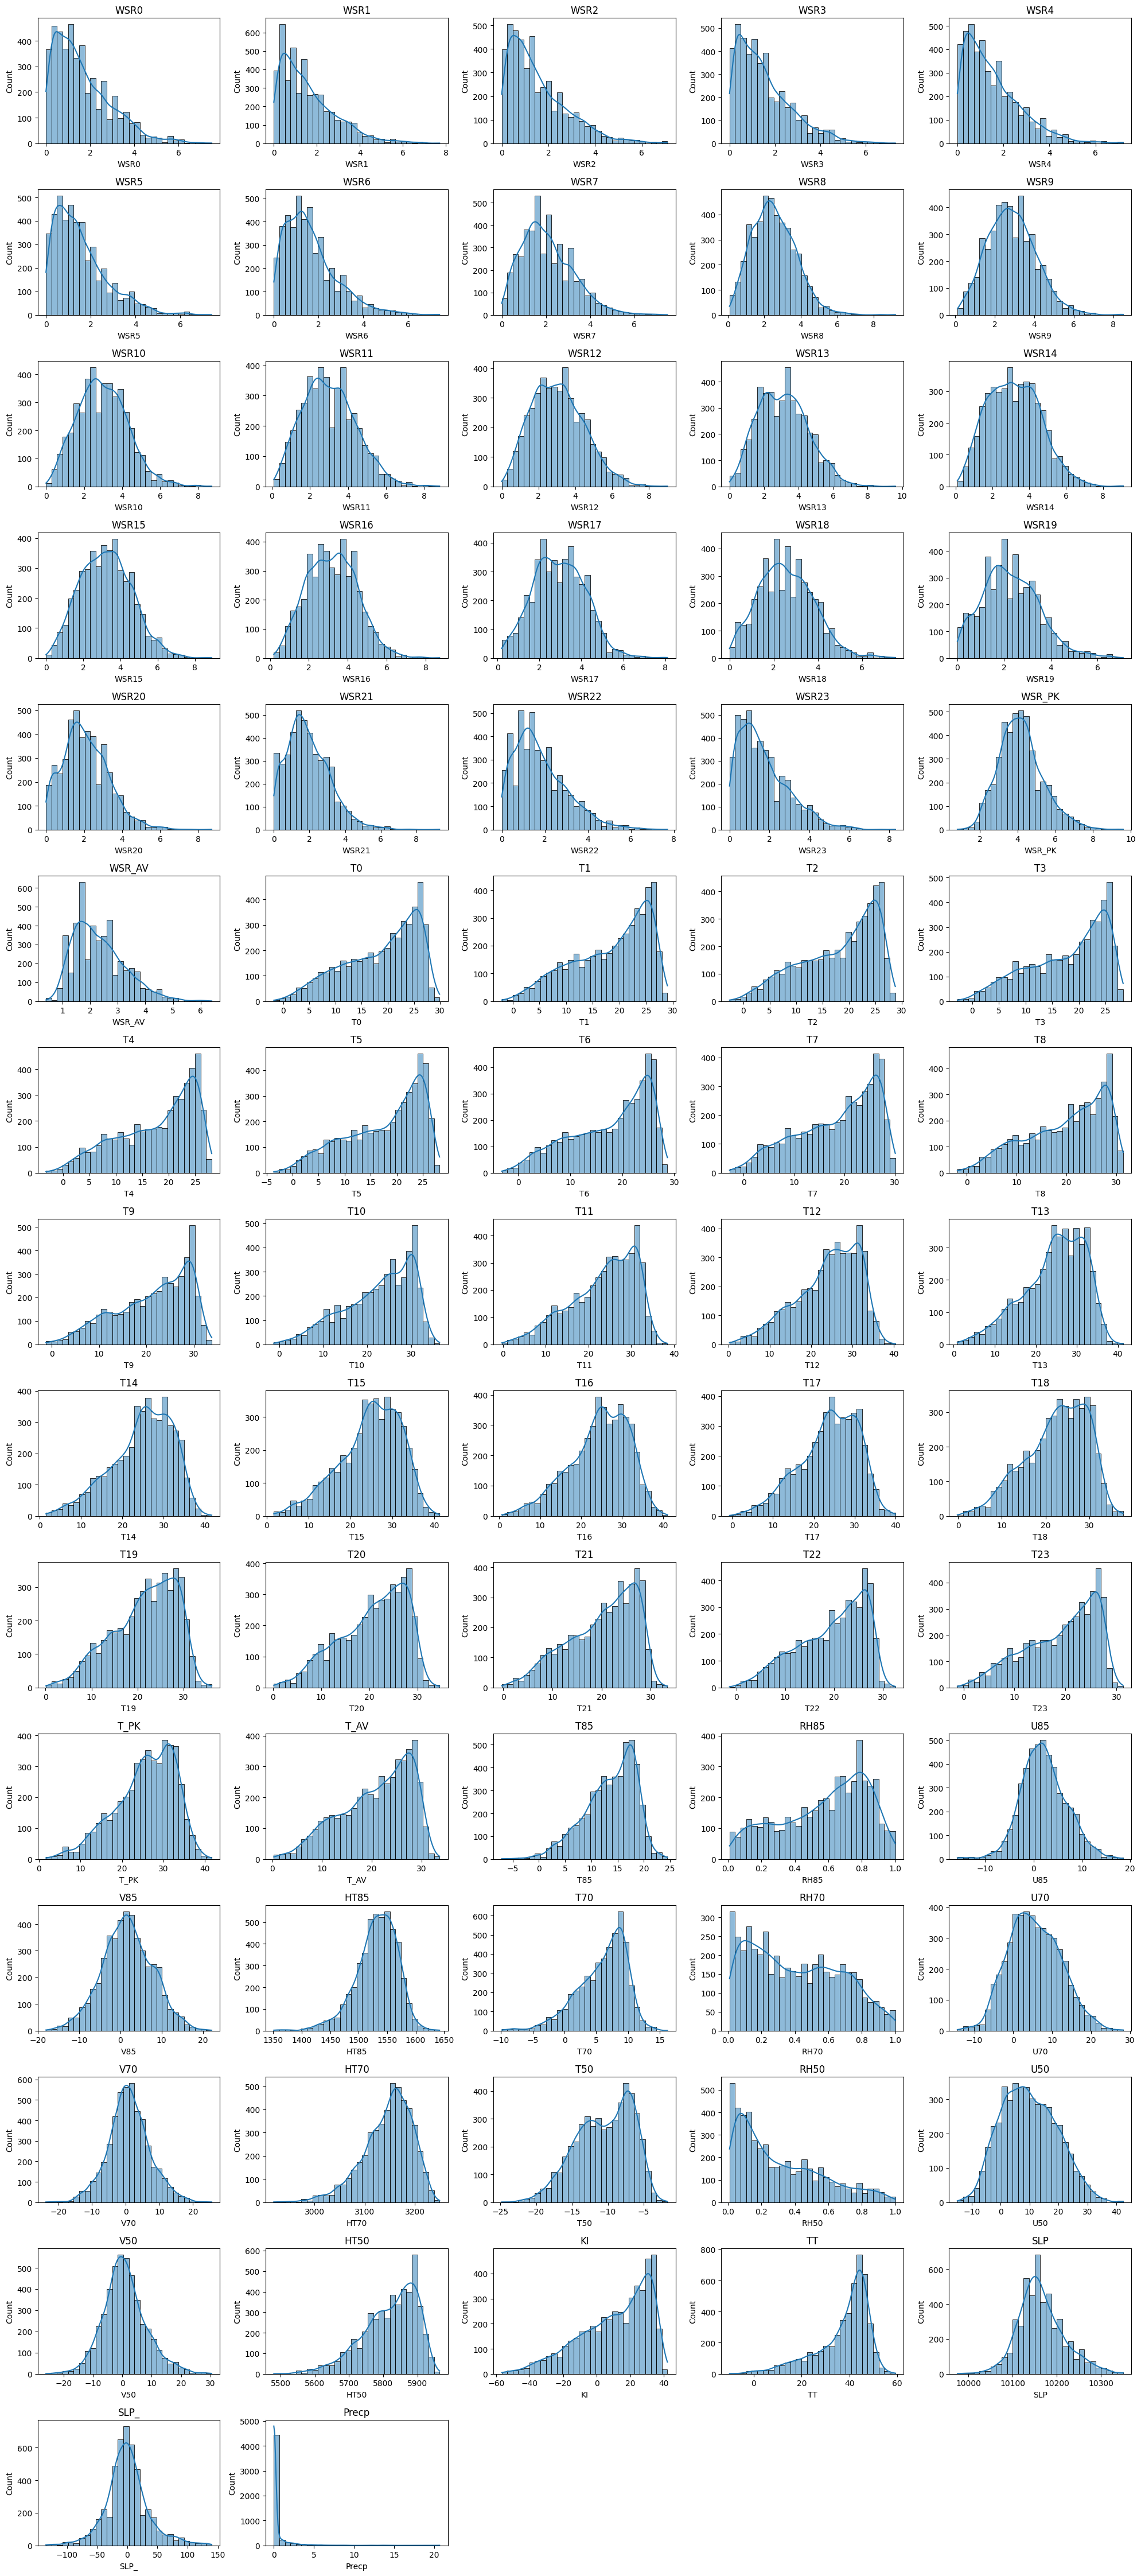

In [94]:
num_features = df.shape[1]  # Total number of columns
cols_per_row = 5  # Number of histograms per row
rows = (num_features // cols_per_row) + 1  # Calculate rows needed

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 3))  # Adjust height dynamically

axes = axes.flatten()  # Flatten for easier iteration

for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=30, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)
    
# Hide any unused subplots (in case cols_per_row * rows > num_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [122]:
df.isnull().sum().describe()

count     73.000000
mean     409.246575
std      148.290797
min        0.000000
25%      350.000000
50%      376.000000
75%      574.000000
max      600.000000
dtype: float64

In [123]:
#Calculating the null values percentage
(df.isnull().sum().sum() / df.size) * 100

8.071924562967766

Since null values account for around 8% of the total entries in the dataset. I will proceed with imputing them with the mean value as all the 72 independent features are of numerical nature.

In [144]:
#Imputing null values with mean 
#Since null values in a feature might be related to another independent feature. I will use KNN imputer for imputation task 
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [126]:
print(f"Before Handling Null values: {df.isnull().sum().sum()}, After handling null values: {df_imputed.isnull().sum().sum()}")

Before Handling Null values: 29875, After handling null values: 0


Since most of the features are of numeric nature. Let's check for NaN values as well

In [127]:
np.isnan(df_imputed).sum().sum()

0

In [128]:
#Explore the label vector 
df['Class'].info()

<class 'pandas.core.series.Series'>
Index: 5070 entries, 0 to 2535
Series name: Class
Non-Null Count  Dtype  
--------------  -----  
5070 non-null   float64
dtypes: float64(1)
memory usage: 79.2 KB


In [129]:
df['Class'].nunique()

2

Since the label vector has 2 unique values, it is a binary classification task.

In [140]:
df["Class"].sample(n = 10)

1657    0.0
797     0.0
1151    0.0
566     0.0
486     1.0
1893    0.0
1656    0.0
1575    0.0
779     0.0
1899    0.0
Name: Class, dtype: float64

In [106]:
df["Class"].value_counts()

Class
0.0    4837
1.0     233
Name: count, dtype: int64

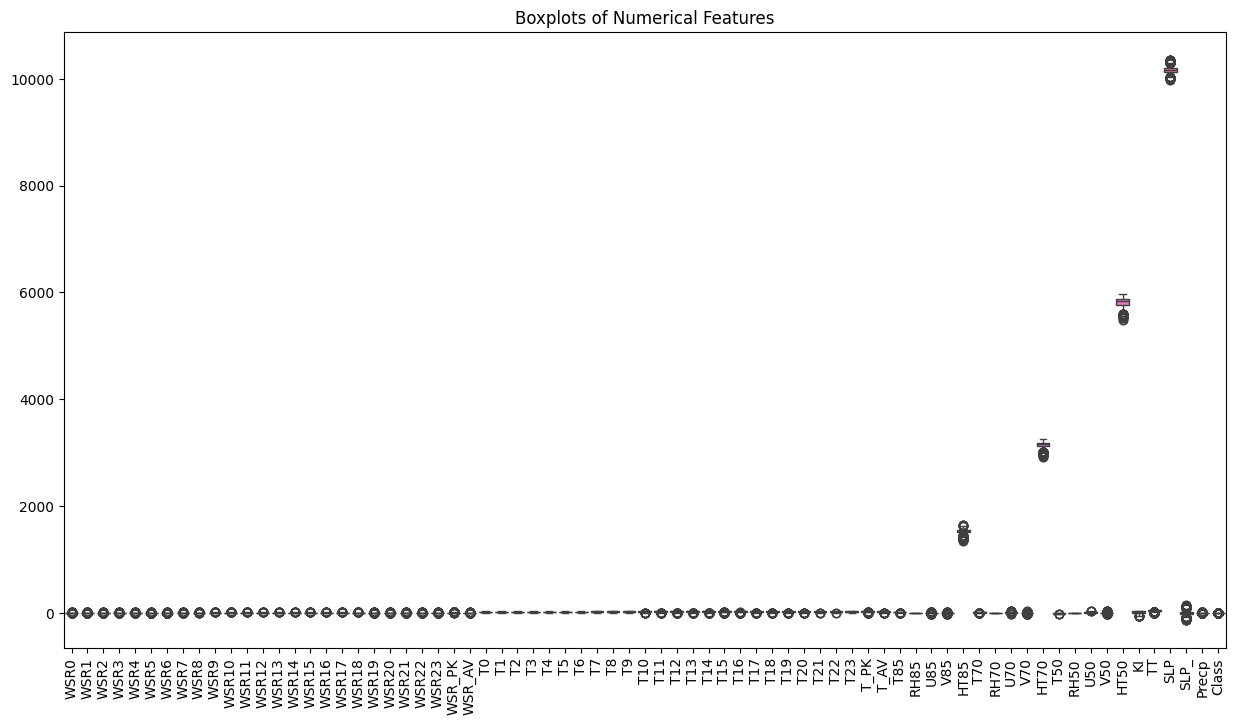

In [145]:
#Check for outliers
def outlierVisualizer(dataframe):
 plt.figure(figsize=(15, 8))
 sns.boxplot(data=dataframe.select_dtypes(include=['float64']))
 plt.xticks(rotation=90)  # Rotate labels for readability
 plt.title("Boxplots of Numerical Features")
 plt.show()


outlierVisualizer(df_imputed)

Since there are outliers in the dataset, we will clip them.

In [146]:
#Check for outliers
def check_outliers(dataframe):
  numercial_features = dataframe.select_dtypes(include = 'float64').columns
  outlier_counts = {}
  for feature in numercial_features:
      Q1 = dataframe[feature].quantile(0.25)
      Q3 = dataframe[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR
      # Clip the outliers
      dataframe[feature] = dataframe[feature].clip(lower=lower_limit, upper=upper_limit)

    # Store count of outliers
      outliers = dataframe[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)]
      outlier_counts[feature] = outliers.shape[0]

 
  return outlier_counts

#Apply the function
check_outliers(df_imputed)

{'WSR0': 0,
 'WSR1': 0,
 'WSR2': 0,
 'WSR3': 0,
 'WSR4': 0,
 'WSR5': 0,
 'WSR6': 0,
 'WSR7': 0,
 'WSR8': 0,
 'WSR9': 0,
 'WSR10': 0,
 'WSR11': 0,
 'WSR12': 0,
 'WSR13': 0,
 'WSR14': 0,
 'WSR15': 0,
 'WSR16': 0,
 'WSR17': 0,
 'WSR18': 0,
 'WSR19': 0,
 'WSR20': 0,
 'WSR21': 0,
 'WSR22': 0,
 'WSR23': 0,
 'WSR_PK': 0,
 'WSR_AV': 0,
 'T0': 0,
 'T1': 0,
 'T2': 0,
 'T3': 0,
 'T4': 0,
 'T5': 0,
 'T6': 0,
 'T7': 0,
 'T8': 0,
 'T9': 0,
 'T10': 0,
 'T11': 0,
 'T12': 0,
 'T13': 0,
 'T14': 0,
 'T15': 0,
 'T16': 0,
 'T17': 0,
 'T18': 0,
 'T19': 0,
 'T20': 0,
 'T21': 0,
 'T22': 0,
 'T23': 0,
 'T_PK': 0,
 'T_AV': 0,
 'T85': 0,
 'RH85': 0,
 'U85': 0,
 'V85': 0,
 'HT85': 0,
 'T70': 0,
 'RH70': 0,
 'U70': 0,
 'V70': 0,
 'HT70': 0,
 'T50': 0,
 'RH50': 0,
 'U50': 0,
 'V50': 0,
 'HT50': 0,
 'KI': 0,
 'TT': 0,
 'SLP': 0,
 'SLP_': 0,
 'Precp': 0,
 'Class': 0}

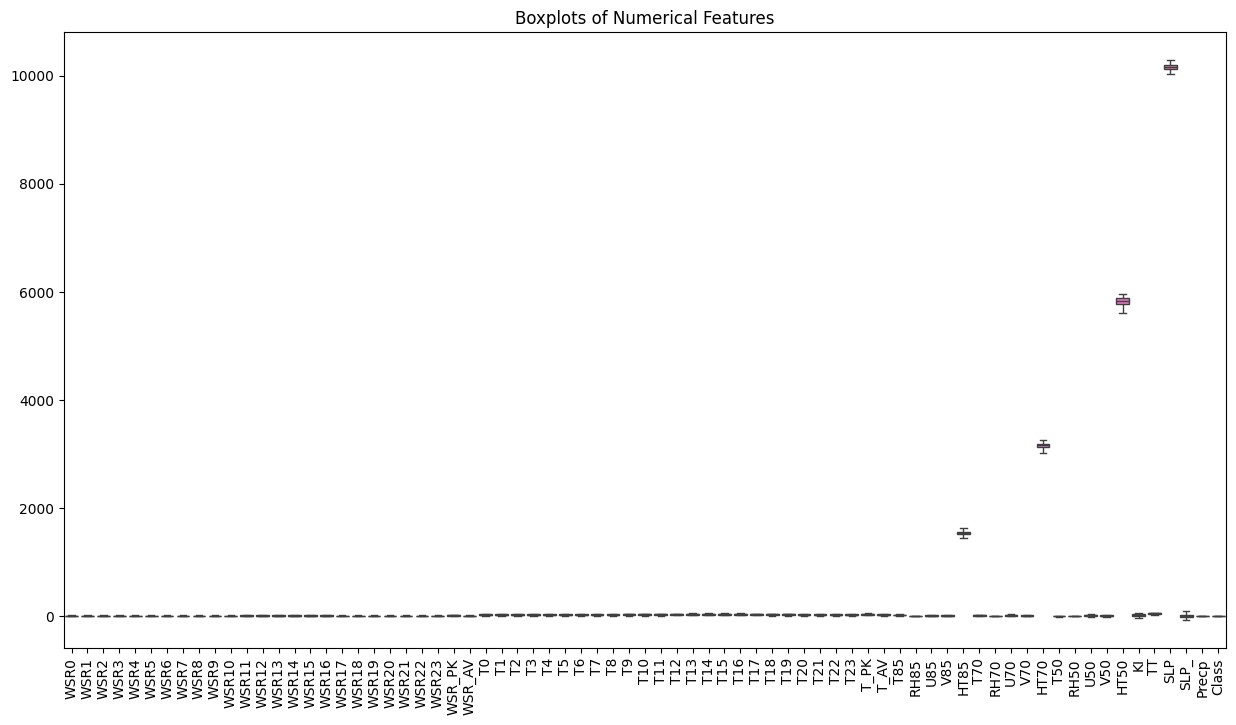

In [147]:
# Check for outliers after clipping them
outlierVisualizer(df_imputed)

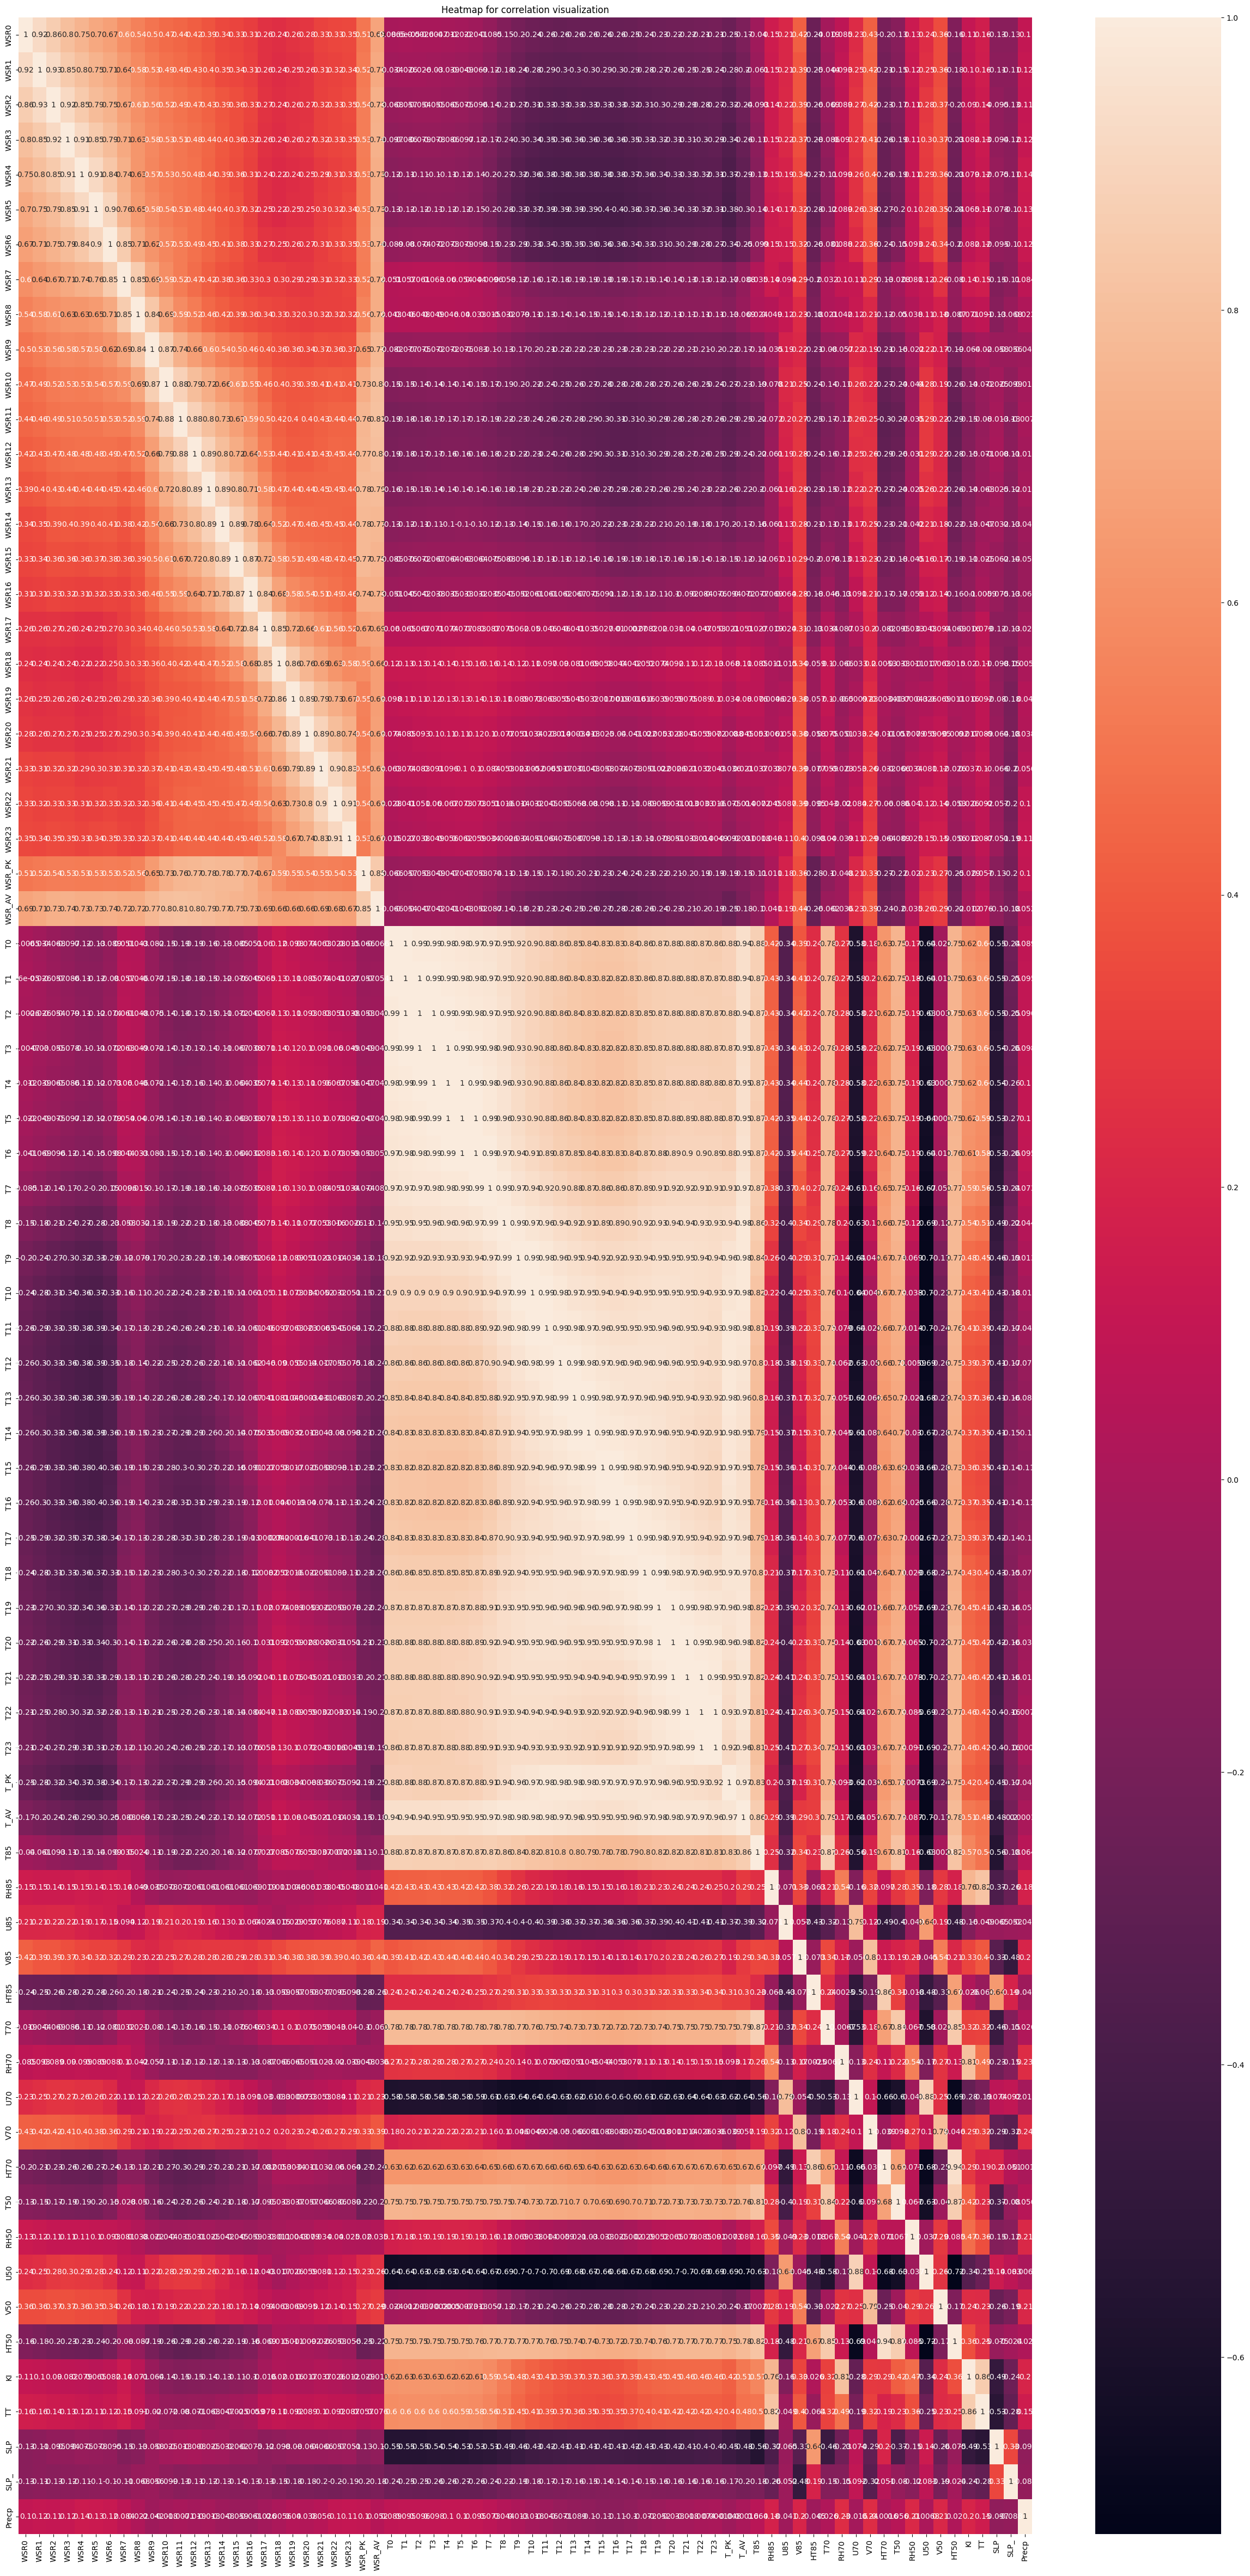

In [153]:
# Let us correlation among each independent feature
plt.figure(figsize=(30,60))
plt.title("Heatmap for correlation visualization")
sns.heatmap(df.drop(columns = "Class").corr(), annot = True)
plt.show()

In [155]:
# Split the dataframe into feature matrix and label vector
X = df_imputed.drop(columns = "Class")
y = df['Class']

In [156]:
def train_test_split(X, y, test_size=0.3, random_seed=42, stratify=y):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    stratify : np.ndarray or None
    If not None, data is split in a stratified fashion, using this as the class labels.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    if stratify is not None:
        unique_classes, class_counts = np.unique(stratify, return_counts=True)
        test_class_counts = (class_counts * test_size).astype(int)
        test_indices = np.hstack([
            np.random.choice(np.where(stratify == cls)[0], count, replace=False)
            for cls, count in zip(unique_classes, test_class_counts)
        ])
        train_indices = np.setdiff1d(np.arange(len(X)), test_indices)
    else:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        test_split_size = int(len(X) * test_size)
        test_indices = indices[:test_split_size]
        train_indices = indices[test_split_size:]

    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test
#Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.3, random_seed= 42, stratify=y)


In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3550, 72)
(1520, 72)
(3550,)
(1520,)


In [161]:
print(f"Distribution of class labels in y train:\n{pd.Series(y_train.flatten()).value_counts()}")
print(f"Distribution of class labels in y test:\n{pd.Series(y_test.flatten()).value_counts()}")


Distribution of class labels in y train:
0.0    3386
1.0     164
Name: count, dtype: int64
Distribution of class labels in y test:
0.0    1451
1.0      69
Name: count, dtype: int64


Seems like stratify parameter in train test split worked

In [163]:
# Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [166]:
# Sigmoid Regression from scratch
class SigmoidRegression:
    def __init__(self, learning_rate, iterations, C):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.C = C  # regularization parameter
        
    def sigmoid(self, z):
        # Clip z to avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        y = y.reshape(self.m)
        
        # Add tolerance for convergence
        prev_cost = float('inf')
        tolerance = 1e-4
        
        for i in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Add L2 regularization term
            dw = (1/self.m) * np.dot(X.T, (y_predicted - y)) + (1/self.C) * self.weights
            db = (1/self.m) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Check convergence
            cost = -np.mean(y * np.log(y_predicted + 1e-15) + 
                          (1-y) * np.log(1 - y_predicted + 1e-15))
            if abs(prev_cost - cost) < tolerance:
                print(f"Converged after {i} iterations")
                break
            prev_cost = cost
    def predict(self, X):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            # Add probability threshold as a parameter if needed
            y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
            return np.array(y_predicted_class)
    
    def predict_proba(self, X):
            """Return probability estimates for samples"""
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            # Return probabilities for both classes (0 and 1)
            return np.vstack([1 - y_predicted, y_predicted]).T


In [167]:
# Model fitting
model = SigmoidRegression(learning_rate=0.01, iterations=10000, C = 1)
model.fit(X_train_standardized, y_train)
# Make predictions
y_pred_sr = model.predict(X_test_standardized)
# Calculate probabilities
probabilities = model.predict_proba(X_test_standardized)
print(y_pred_sr)

Converged after 860 iterations
[0 0 0 ... 0 0 0]


In [ ]:
# print the probabilities
probabilities

array([[0.89826988, 0.10173012],
       [0.89835883, 0.10164117],
       [0.8669486 , 0.1330514 ],
       ...,
       [0.86585292, 0.13414708],
       [0.88813659, 0.11186341],
       [0.86800675, 0.13199325]])

Model Evaluation (Training Set)

In [170]:
# Make predictions for training set
y_pred_train_sr = model.predict(X_train_standardized)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred_train_sr)
recall = recall_score(y_train, y_pred_train_sr)
precision = precision_score(y_train, y_pred_train_sr)
F1_score = f1_score(y_train, y_pred_train_sr)
print(f"Recall(Sigmoid Regression): {recall}")
print(f"Precision(Sigmoid): {precision}")
print(f"f1_score(Sigmoid Regression): {F1_score}")
print(f"Accuracy(Sigmoid Regression): {accuracy}")


Recall(Sigmoid Regression): 0.0
Precision(Sigmoid): 0.0
f1_score(Sigmoid Regression): 0.0
Accuracy(Sigmoid Regression): 0.9538028169014084


In [168]:
pd.Series(y_pred_sr).value_counts()

0    1520
Name: count, dtype: int64

In [169]:
accuracy = accuracy_score(y_test, y_pred_sr)
recall = recall_score(y_test, y_pred_sr)
precision = precision_score(y_test, y_pred_sr)
F1_score = f1_score(y_test, y_pred_sr)
print(f"Recall(Sigmoid Regression): {recall}")
print(f"Precision(Sigmoid): {precision}")
print(f"f1_score(Sigmoid Regression): {F1_score}")
print(f"Accuracy(Sigmoid Regression): {accuracy}")

Recall(Sigmoid Regression): 0.0
Precision(Sigmoid): 0.0
f1_score(Sigmoid Regression): 0.0
Accuracy(Sigmoid Regression): 0.9546052631578947


Since the label vector is extremely imbalanced. We got our recall, precision, and f1_score to be 0. Indicating model slightly overfit.

Build Two Classification Model
1) Decision Tree Classifier
2) Random Forest Classifier

In [173]:
# Model 1: Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
y_pred_tree[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Model Evaluation of Decision Tree Classifier

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# print the metrics

print(f"Accuracy(Tree): {accuracy_tree}")
print(f"Precision(Tree): {precision_tree}")
print(f"Recall(Tree): {recall_tree}")
print(f"f1(Tree): {f1_tree}")


Accuracy(Tree): 0.95
Precision(Tree): 0.4492753623188406
Recall(Tree): 0.4492753623188406
f1(Tree): 0.4492753623188406


Looking at the metrics, we can infer that decision tree performed relatively better than the sigmoid regression model built from scratch

In [175]:
# Model 2: Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_rfc = RFC.predict(X_test)
y_pred_rfc[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
accuracy_RFC = accuracy_score(y_test, y_pred_rfc)
precision_RFC = precision_score(y_test, y_pred_rfc)
recall_RFC = recall_score(y_test, y_pred_rfc)
f1_RFC = f1_score(y_test, y_pred_rfc)

print(f"Accuracy(RFC): {accuracy_RFC}")
print(f"Precision(RFC): {precision_RFC}")
print(f"Recall(RFC): {recall_RFC}")
print(f"f1(RFC): {f1_RFC}")

Accuracy(RFC): 0.9605263157894737
Precision(RFC): 0.6046511627906976
Recall(RFC): 0.37681159420289856
f1(RFC): 0.4642857142857143


Hyperparameter Tuning of Decision Tree Classifier with Cross Validation

In [177]:
# Define the parameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize classifiers
dt_clf = DecisionTreeClassifier()

# Initialize RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(
    estimator=dt_clf, 
    param_distributions=dt_param_grid, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

# Fit the models
dt_random_search.fit(X_train, y_train)

# Get the best parameters and best score for Decision Tree
best_dt_params = dt_random_search.best_params_
best_dt_score = dt_random_search.best_score_

print(f"Best Parameters for Decision Tree: {best_dt_params}")
print(f"Best Score for Decision Tree: {best_dt_score}")

Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best Score for Decision Tree: 0.9591549295774648


In [178]:
# Use the best estimators to make predictions
best_dt_model = dt_random_search.best_estimator_
dt_pred = best_dt_model.predict(X_test)
dt_pred

array([0., 0., 0., ..., 0., 1., 1.])

In [179]:
#Randomized Search CV for Random Forest Classifier
# Define hyperparameter grid with random distributions
param_dist = {
    'n_estimators': randint(10, 200),        # Number of trees in the forest
    'max_depth': randint(1, 20),             # Maximum depth of the trees
    'min_samples_split': randint(2, 10),     # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10),      # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider for best split
}
#Perform Randomized Search 
random_search_cv = RandomizedSearchCV(RFC, param_dist, n_iter = 20, cv = 5, scoring = 'accuracy', random_state=42)

#Fit the model 
random_search_cv.fit(X_train, y_train)

#Print best parameters and accuracy 
print("Best parameters Randomized Search: ", random_search_cv.best_params_)
print("Best Accuracy: ", random_search_cv.best_score_)

Best parameters Randomized Search:  {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 98}
Best Accuracy:  0.9608450704225351


In [180]:
# Use the best model to make predictions
best_rf_model = random_search_cv.best_estimator_
rf_pred = best_rf_model.predict(X_test)
rf_pred

array([0., 0., 0., ..., 0., 1., 1.])

Feature Selection for Both Models using Recursive Feature Elimination(RFE). Since there are 72 features, we will use thumb rule for the optimal numbers of features to be selected. 

In [181]:
optimalNumberofFeatures = int(np.sqrt(len(df.columns)))
optimalNumberofFeatures

8

In [ ]:
# Perform RFE for Decision Tree
rfe_dt = RFE(estimator=dt_clf, n_features_to_select=optimalNumberofFeatures)  # Select top 8 features
X_train_selected_dt = rfe_dt.fit_transform(X_train, y_train)
X_test_selected_dt = rfe_dt.transform(X_test)
# Print selected features for Decision Tree
selected_features_dt = X.columns[rfe_dt.support_]
print("Selected features for Decision Tree:", list(selected_features_dt))

Selected features for Decision Tree: ['WSR0', 'WSR10', 'T2', 'T7', 'T15', 'U70', 'RH50', 'TT']


In [ ]:
# Perform RFE for Random Forest
rfe_rf = RFE(estimator=RFC, n_features_to_select = optimalNumberofFeatures)  # Select top 8 features
X_train_selected_rf = rfe_rf.fit_transform(X_train, y_train)
X_test_selected_rf = rfe_rf.transform(X_test)
# Print selected features for Random Forest
selected_features_rf = X.columns[rfe_rf.support_]
print("Selected features for Random Forest:", list(selected_features_rf))

Selected features for Random Forest: ['WSR10', 'T1', 'T2', 'T14', 'T15', 'V85', 'U70', 'V70']


Building the final classification model with random forest 


In [188]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X[list(selected_features_rf)].values, y.values, test_size=0.3, stratify=y)

In [190]:
rfc_final = RandomForestClassifier(max_depth= 9, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 98)
rfc_final.fit(X_train_final, y_train_final)
final_predictions = rfc_final.predict(X_test_final)

In [191]:
final_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [196]:
recall_final = recall_score(y_test_final, final_predictions)
precision_final = precision_score(y_test_final, final_predictions)
accuracy_final = accuracy_score(y_test_final, final_predictions)
f1_final = f1_score(y_test_final, final_predictions)

# print the final metrics

print(f"Accuracy: {accuracy_final}")
print(f"Precision: {precision_final}")
print(f"Recall: {recall_final}")
print(f"f1: {f1_final}")


Accuracy: 0.9618671926364234
Precision: 0.6764705882352942
Recall: 0.32857142857142857
f1: 0.4423076923076923


The model performance has relatively improved.

In [198]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_final, final_predictions)
conf_matrix

array([[1440,   11],
       [  47,   23]], dtype=int64)

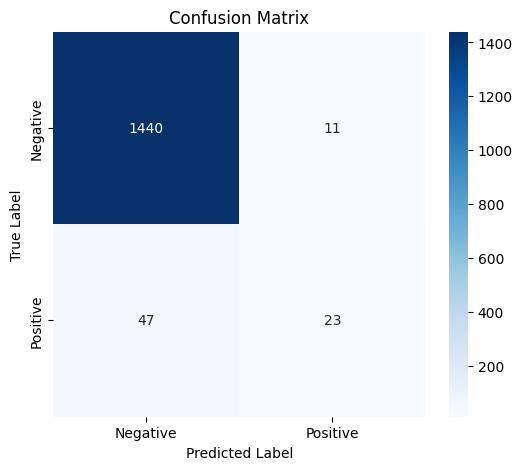

In [199]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

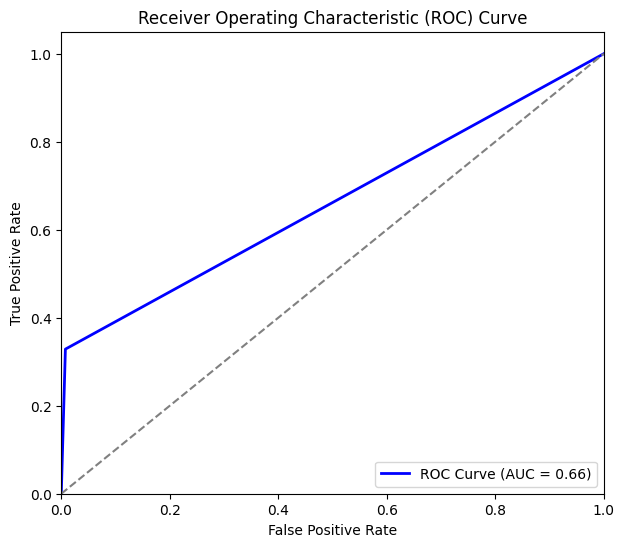

In [202]:
# ROC AUC Curve Visualization
fpr, tpr, _ = roc_curve(y_test_final, final_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()